In [ ]:
#import important library
#load the image folder in google drive from laptop
#to read the image from drive copy the path of image folder
#in this folder there are so many different image folder are there so read the--
#each folder image run for loop
#is main jo model liye hain us ka input image ka size 224 hai...
#isliye har image ka size 224 karna hoga...
#or jo image predict krna h us ka v size ko 224 karna hoga
#  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os

In [2]:
img_array=cv2.imread('/content/drive/MyDrive/fer_new/train/0/Training_143373.jpg')

In [3]:
img_array.shape

(48, 48, 3)

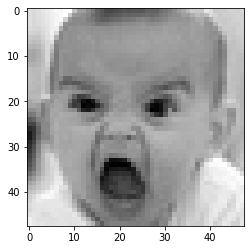

In [4]:
plt.imshow(img_array)

In [5]:
Datadirectory='/content/drive/MyDrive/fer_new/train'

In [6]:
Classes=['0','1','2','3','4','5','6']

Training_247656.jpg


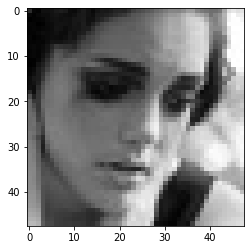

In [7]:
for category in Classes:
    path=os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        print(img)        
        img_array=cv2.imread(os.path.join(path,img))
        #backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        #plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB))
        plt.imshow(img_array)
        plt.show()           
        break
    break

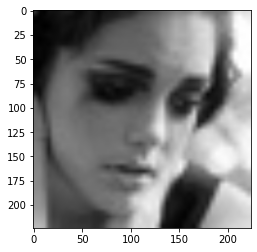

In [8]:
img_size =224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
training_Data =[]

def create_training_Data():
    for category in Classes:
        path=os.path.join(Datadirectory,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array= cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [10]:
create_training_Data()

In [11]:
print(len(training_Data))

140


In [12]:
import random

random.shuffle(training_Data)

In [13]:
x=[]
y=[]

for features,label in training_Data:
    x.append(features)
    y.append(label)
    
x=np.array(x).reshape(-1,img_size,img_size,3)  #converting into 4 dimension

In [14]:
y=np.array(y)

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
model=tf.keras.applications.MobileNetV2()  #pretrain model

14540800/14536120 [==============================] - 0s 0us/step


In [17]:
base_input = model.layers[0].input

In [18]:
base_output=model.layers[-2].output

In [19]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output)

In [20]:
new_model = keras.Model(inputs=base_input,outputs=final_output)

In [21]:
new_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
new_model.fit(x,y,epochs=2)

Epoch 1/2
5/5 [==============================] - 37s 513ms/step - loss: 2.1360 - accuracy: 0.1214
Epoch 2/2
5/5 [==============================] - 2s 300ms/step - loss: 1.4545 - accuracy: 0.5714


In [29]:
frame=cv2.imread('/content/Training_531833.jpg')

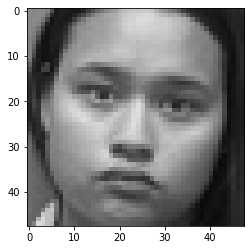

In [30]:
plt.imshow(frame)

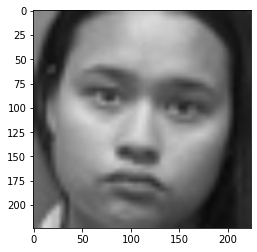

In [39]:
img_size =224
frame1=cv2.resize(frame,(img_size,img_size))
plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
#plt.imshow(frame1)
plt.show()

In [41]:
frame1.shape

(224, 224, 3)

In [42]:
frame12=np.array(frame1).reshape(-1,img_size,img_size,3)

In [43]:
what =new_model.predict(frame12)

In [44]:
what[0]

array([0.05540315, 0.10717826, 0.27004844, 0.00290969, 0.05015653,
       0.08576439, 0.42853948], dtype=float32)